In [1]:
import sys
sys.path.append('..')
from backend.data_cleaning.utils import scroll_pages, extract_tag
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dump_path = "../subsample_chunked.xml"

In [3]:
chunks_info = []
with open(dump_path, "r") as f:
    for page in scroll_pages(f):
        page = extract_tag(page, tag="page", add_tag=False)
        page = json.loads(page)
        for chunk in page:
            chunks_info.append({"length": len(chunk["text"]), "titles": chunk["titles"]})

In [4]:
chunk_lenghts = [chunk["length"] for chunk in chunks_info]
chunk_lenghts = np.array(chunk_lenghts)

In [5]:
len(chunk_lenghts)

7811498

In [6]:
chunk_lenghts.sort()
stuff = np.cumsum(chunk_lenghts) / np.sum(chunk_lenghts)

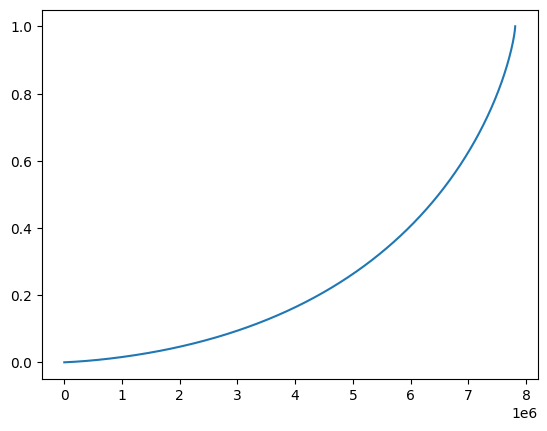

In [9]:
plt.plot(stuff)
plt.show()

In [13]:
for i in np.arange(50, 200, 5):
    print(i, (chunk_lenghts < i).sum() / len(chunk_lenghts))

50 0.0
55 0.003568457676107707
60 0.008473278748839212
65 0.013484097416398238
70 0.01849939665861785
75 0.023598802688037556
80 0.028860789569427017
85 0.03442911974118153
90 0.03996851820227055
95 0.04620765440892387
100 0.05197607424337816
105 0.057672676866844234
110 0.06367818310905284
115 0.06978277405946977
120 0.07584844801854906
125 0.08187955754453242
130 0.08792257259747106
135 0.09416785359223033
140 0.10058070807929542
145 0.10698293720359399
150 0.1135609328710063
155 0.12014584142503781
160 0.12680666371546148
165 0.1334912970597957
170 0.1401500710875174
175 0.14677005614032032
180 0.15329620515808876
185 0.15992847978710356
190 0.1665313106397774
195 0.1728723479158543


In [5]:
# compute stats on chunk lengths
print("mean chunk length:", np.mean(chunk_lenghts))
print("std chunk length:", np.std(chunk_lenghts))
print("max chunk length:", np.max(chunk_lenghts))
print("min chunk length:", np.min(chunk_lenghts))
print("median chunk length:", np.median(chunk_lenghts))

mean chunk length: 882.9176324438668
std chunk length: 1051.0897013351394
max chunk length: 148444
min chunk length: 51
median chunk length: 552.0


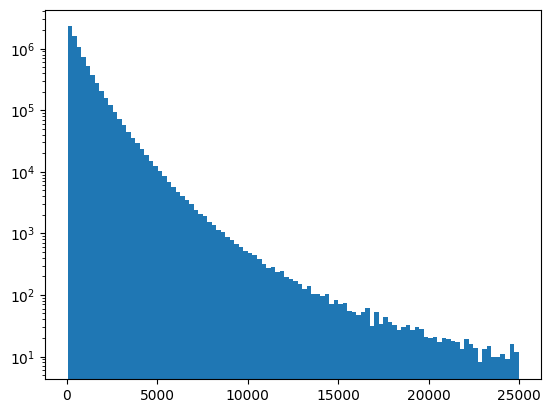

In [6]:
plt.hist(chunk_lenghts[chunk_lenghts < 25000], bins=100)
plt.yscale('log')

In [7]:
print("Number of chunks with more than 25000 characters:", len(chunk_lenghts[chunk_lenghts > 25000]))

Number of chunks with more than 25000 characters: 356


(array([152818., 159396., 185208., 180004., 199330., 197462., 206610.,
        185222., 185329., 169320., 172120., 158379., 161304., 147860.,
        150657., 138703., 140782., 129244., 131450., 121102., 122510.,
        112519., 114710., 105606., 102065., 104091.,  95541.,  97201.,
         89335.,  91028.,  84011.,  85987.,  79131.,  80713.,  74060.,
         75741.,  69992.,  72067.,  65290.,  67419.,  62050.,  64284.,
         59065.,  59997.,  56161.,  57122.,  52676.,  54220.,  50102.,
         48750.,  50010.,  46156.,  47351.,  43689.,  44759.,  41429.,
         42897.,  39167.,  40538.,  37171.,  38355.,  35582.,  36191.,
         33481.,  34710.,  31929.,  33007.,  30720.,  31453.,  29101.,
         29825.,  27570.,  28395.,  26291.,  25845.,  26911.,  24844.,
         25543.,  23607.,  24021.,  22139.,  23026.,  21481.,  21810.,
         20527.,  21141.,  19621.,  20318.,  18802.,  18999.,  17845.,
         18453.,  17308.,  17500.,  16289.,  16767.,  15618.,  15904.,
      

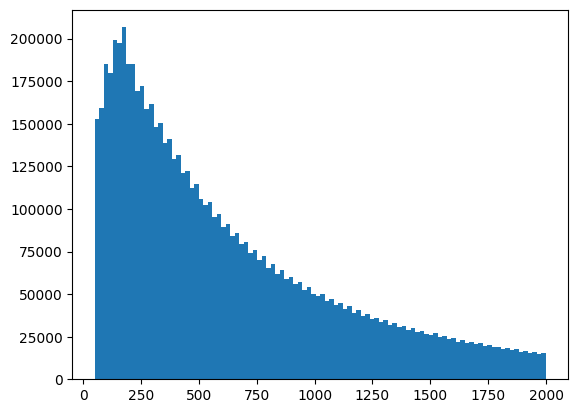

In [10]:
plt.hist(chunk_lenghts[chunk_lenghts < 2000], bins=100)